<a href="https://colab.research.google.com/github/farhanasajeer/github/blob/main/datapre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/DataPreprocessing.csv')

In [ ]:
data

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


In [ ]:
data.head()

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes


In [ ]:
data.shape

(10, 4)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10 non-null     object 
 1   Age             9 non-null      float64
 2   Income          9 non-null      float64
 3   Online Shopper  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [ ]:
data.isna().sum()

Region            0
Age               1
Income            1
Online Shopper    0
dtype: int64

In [ ]:
data.dtypes

Region             object
Age               float64
Income            float64
Online Shopper     object
dtype: object

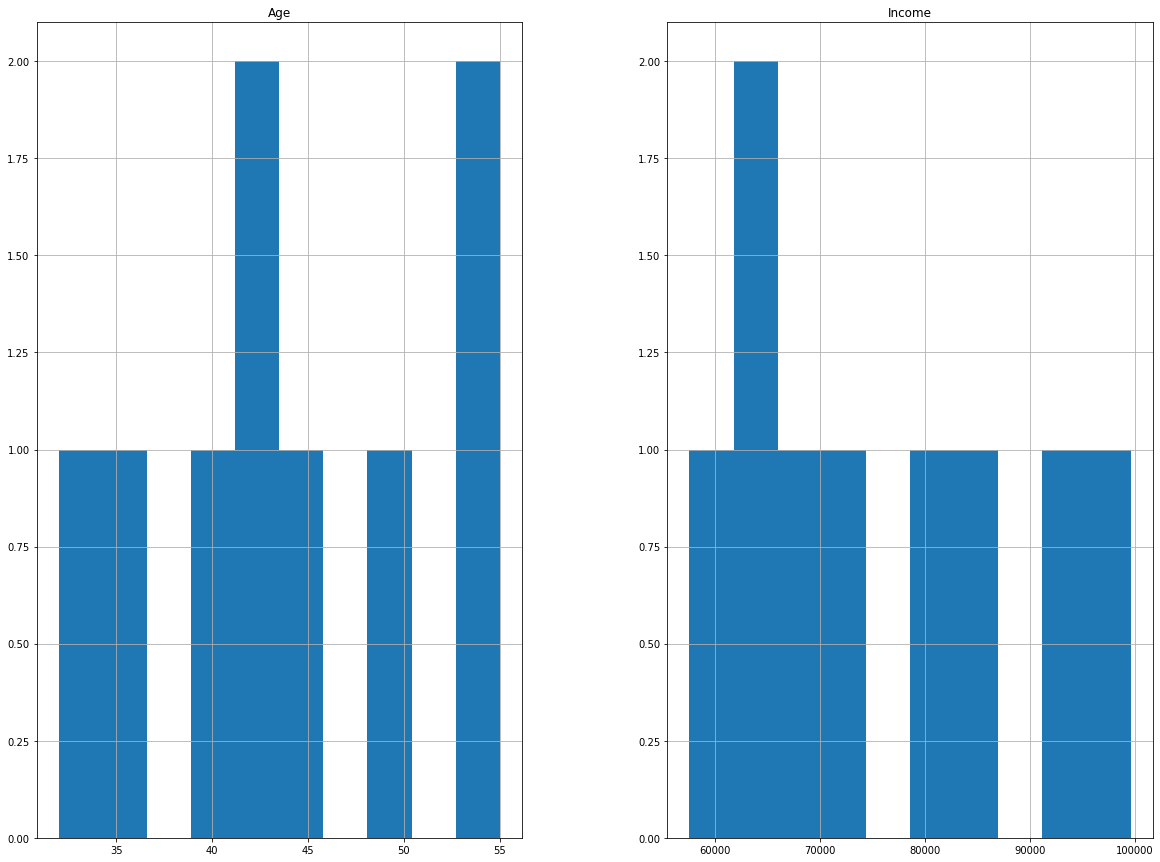

In [ ]:
dgraph=data.select_dtypes(include=['float'])
dgraph.hist(figsize=(20,15))
plt.show()

In [ ]:
data.columns

Index(['Region', 'Age', 'Income', 'Online Shopper'], dtype='object')

In [ ]:
for i in ['Age', 'Income']:
       data[i]=data[i].fillna(data[i].median())
data.isna().sum()

Region            0
Age               0
Income            0
Online Shopper    0
dtype: int64

In [ ]:
data=pd.get_dummies(data)
data.head()

,Age,Income,Region_Brazil,Region_India,Region_USA,Online Shopper_No,Online Shopper_Yes
0,49.0,86400.0,0,1,0,1,0
1,32.0,57600.0,1,0,0,0,1
2,35.0,64800.0,0,0,1,1,0
3,43.0,73200.0,1,0,0,1,0
4,45.0,73200.0,0,0,1,0,1


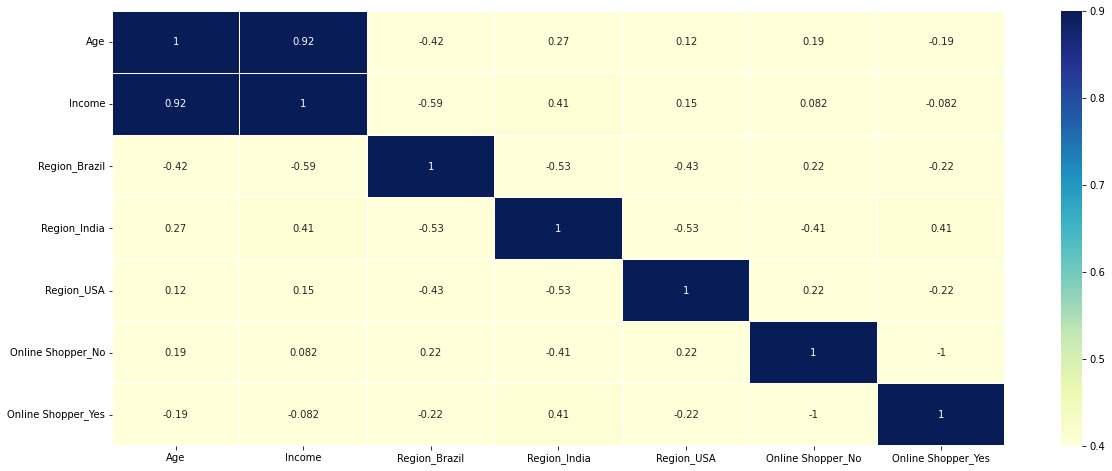

In [ ]:
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='YlGnBu')

In [ ]:
# split the dataset and create the model
data.columns
y=data['Age']
x=data.drop('Age',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=42, test_size=0.2)
# create linear model
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)
# check the mse
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,prediction))
# r2 ed value
from sklearn.metrics import r2_score
print('R squared value is:',r2_score(y_test,prediction))

MSE is: 24.714327188271135
R squared value is: 0.8131241800508799


In [ ]:


x.describe()

,Income,Region_Brazil,Region_India,Region_USA,Online Shopper_No,Online Shopper_Yes
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,76200.000000,0.300000,0.400000,0.300000,0.500000,0.500000
std,13916.896206,0.483046,0.516398,0.483046,0.527046,0.527046
min,57600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,73200.000000,0.000000,0.000000,0.000000,0.500000,0.500000
75%,84900.000000,0.750000,1.000000,0.750000,1.000000,1.000000
max,99600.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
# std scaler
from sklearn import preprocessing
standards=preprocessing.StandardScaler()
x=standards.fit_transform(x)

In [ ]:
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5
count,1.000000e+01,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000
mean,-3.330669e-17,-2.220446e-17,-2.220446e-17,0.000000,0.000000,0.000000
std,1.054093e+00,1.054093e+00,1.054093e+00,1.054093,1.054093,1.054093
min,-1.408800e+00,-6.546537e-01,-8.164966e-01,-0.654654,-1.000000,-1.000000
25%,-7.725677e-01,-6.546537e-01,-8.164966e-01,-0.654654,-1.000000,-1.000000
50%,-2.272258e-01,-6.546537e-01,-8.164966e-01,-0.654654,0.000000,0.000000
75%,6.589548e-01,9.819805e-01,1.224745e+00,0.981981,1.000000,1.000000
max,1.772361e+00,1.527525e+00,1.224745e+00,1.527525,1.000000,1.000000


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=42, test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,prediction))
print('R squared value is:',r2_score(y_test,prediction))

MSE is: 24.714327188271138
R squared value is: 0.8131241800508798


In [ ]:
# min-max scaling
# we change the future set x by std scaling. again take x from the dataset
x=data.drop('Age',axis=1)
x.describe()

,Income,Region_Brazil,Region_India,Region_USA,Online Shopper_No,Online Shopper_Yes
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,76200.000000,0.300000,0.400000,0.300000,0.500000,0.500000
std,13916.896206,0.483046,0.516398,0.483046,0.527046,0.527046
min,57600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,73200.000000,0.000000,0.000000,0.000000,0.500000,0.500000
75%,84900.000000,0.750000,1.000000,0.750000,1.000000,1.000000
max,99600.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
# apply this scaling to x.
x=min_max.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.442857,0.300000,0.400000,0.300000,0.500000,0.500000
std,0.331355,0.483046,0.516398,0.483046,0.527046,0.527046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.371429,0.000000,0.000000,0.000000,0.500000,0.500000
75%,0.650000,0.750000,1.000000,0.750000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# again create a linera regression model
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=42, test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,prediction))
print('R squared value is:',r2_score(y_test,prediction))

MSE is: 24.71432718827113
R squared value is: 0.8131241800508799


In [ ]:
# normalization
# normalization is also done in the feature set so again load the feature set x
x=data.drop('Age',axis=1)
x.describe()

,Income,Region_Brazil,Region_India,Region_USA,Online Shopper_No,Online Shopper_Yes
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,76200.000000,0.300000,0.400000,0.300000,0.500000,0.500000
std,13916.896206,0.483046,0.516398,0.483046,0.527046,0.527046
min,57600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,73200.000000,0.000000,0.000000,0.000000,0.500000,0.500000
75%,84900.000000,0.750000,1.000000,0.750000,1.000000,1.000000
max,99600.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x=preprocessing.normalize(x)

In [ ]:
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5
count,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.000000e+00,0.000005,0.000005,0.000004,0.000007,0.000007
std,6.495722e-11,0.000008,0.000006,0.000006,0.000007,0.000007
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000e+00,0.000000,0.000000,0.000000,0.000005,0.000005
75%,1.000000e+00,0.000010,0.000011,0.000008,0.000013,0.000013
max,1.000000e+00,0.000017,0.000014,0.000015,0.000016,0.000017


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=42, test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,prediction))
print('R squared value is:',r2_score(y_test,prediction))

MSE is: 102.28234674222767
R squared value is: 0.2265985123461045


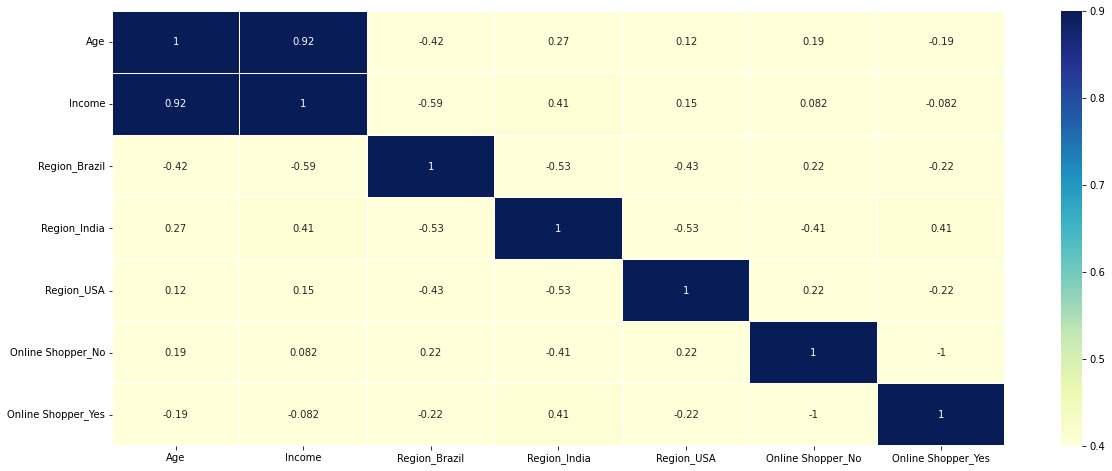

In [ ]:
# feature reduction and check the model is improving
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='YlGnBu')

In [ ]:
data.columns

Index(['Age', 'Income', 'Region_Brazil', 'Region_India', 'Region_USA',
       'Online Shopper_No', 'Online Shopper_Yes'],
      dtype='object')

In [ ]:
# drop the columns with high correlation
data.drop(['Income'],axis=1, inplace=True)

In [ ]:
y=data['Age']
x=data.drop('Age',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=42, test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,prediction))
print('R squared value is:',r2_score(y_test,prediction))

MSE is: 204.2
R squared value is: -0.5440453686200377
